# 機械学習ライブラリの基礎

ここでは、代表的な機械学習アルゴリズムの紹介とチューニングのポイントをその数学的な背景と合わせて紹介します。
機械学習の考え方を身に着ける練習として、単回帰分析と重回帰分析のアルゴリズムを一緒に考えていきましょう。これらを学ぶことで微分と線形代数、統計に関する知識が大幅に深まります。

## 単回帰分析

機械学習アルゴリズムの第一弾として、最も基礎的な単回帰分析について紹介する。ほかの書籍では、基礎的な数学を前半で紹介して、後半で機械学習アルゴリズムを紹介するものも多いが、単回帰分析を学びながら具体的な微分の計算が身につくため、本書では基礎的な数学とそれに対応する機械学習アルゴリズムを交互に学びながら、知識を深めていくこととする。

単回帰分析は教師あり学習の一種である。その中でも、数値（厳密には連続値）を予測する**回帰**を取り扱う手法である。単回帰分析は、ひとつの入力変数からひとつの出力変数を予測する機械学習アルゴリズムである。

### 問題設定

身近な例で想像がつきやすいものとして、家賃の予測を考えることとする。つまり家賃が出力変数 $y$ となる。

次に考えるべき問題としては、入力変数として何を採用するかである。機械学習では、データをもとに学習するが、一番最初にどのデータを使ってどの値を予測させるかは人間側で決めないといけない。そのため、入力変数として何を採用するかといった問題は、人間側の経験に依存する。例えば、今回で言えば、部屋の広さか、駅からの距離か、それとも犯罪発生率を入力変数として採用するか悩ましいところである。今回は私の経験上、重要そうだと感じる部屋の広さを入力変数$x$として採用することとする。実際には、このように複数の候補があった際に、それらすべてを扱うことができるようなモデル化が一般的であり、この次の重回帰分析以降で紹介していく。

機械学習アルゴリズムは、どの手法も大きく分けて3つのステップで成り立っており、この3つのステップが1セットでひとつのアルゴリズムである。

- モデルを決める
- 目的関数を決める
- 最適なパラメータを求める

### Step1. モデルを決める

まず**Step1**は**モデル**を決める。このモデルとは一見もっともらしい用語ではあるが、具体的には何であるのか。それは、出力変数$y$と入力変数$x$の関係性を定式化したものである。家賃の予測値を$y$とした際に、どのように定式化すればうまく予測することができるのか。このモデルは残念ながら機械が自動的に決めてくれるわけではなく、人間が経験と勘で決める作業になる。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/3/01.png)

例えば、与えられたデータセットにおいて、家賃と部屋の広さの関係性が次のようになっている。数値は実際の家賃ではなく計算が簡単にできるように設定しているが、部屋の広さが広くなるほど、家賃が高くなるという設定である。このデータを見た際に、どのように予測のための線を描けば良いかと考えると、このように直線を引く人が多いのではないだろうか。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/3/02.png)

直線の式は中学の数学でもおさらいしたが、$y=ax+b$ である。$a$ を傾き、$b$ を切片と呼んでいた。

今回、このデータセットに対して、直線を引くことが適切であると（人間側の経験で）判断したため、以下のようにモデルを決める。
$$
y = wx + b
$$
傾き $a$ の箇所が $w$ となっているが、一般的に機械学習では、傾きの箇所を**重み (weight)** $w$, 切片 $b$ の箇所を**バイアス (bias)** $b$ で記述することが多いので覚えておいてほしい。

単回帰分析では、このように直線 $y = wx + b$ と決めて、その重みとバイアスの値をデータにうまくフィットするように調整していくのである。この調整すべき変数のことを**パラメータ**と呼ぶ。つまり、今回は $w$ と $b$ がパラメータである。これより、この単回帰分析含めた機械学習の（学習工程の）ゴールとしては、与えられたデータセットに基づいて、最適なパラメータを求めることである。ここで与えられたデータセットとは、部屋の広さ $x$ と教師データとなる家賃 $t$ のことであり、$\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ として表す。ここで、添え字 $n$ ($n=1,2,\ldots,N$)は$n$番目の物件という意味であり、$N$は全体の物件数のことである。この$N$を**サンプル数**という。

ここで、この後の計算を楽に進めるために、**データの中心化**というテクニックを紹介する。図に示すように、部屋の広さと家賃は両方とも正の値であるため、左のグラフのような形になる。これは当然のことで問題はないが、これを中心化では、平均を0とした中央に配置するように変換の処理を施す。この中心化はどのアルゴリズムでも前処理として行うことが一般的である（厳密には正規化がよく用いられ、〇〇章で解説する）。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/3/03.png)

この中心化の処理自体はそれほど難しいものではないが、なぜこのような処理を行うのかが問題である。それはデータの中心化によって、バイアス $b$ が0となり、$y_{c} = wx_{c}$ とすることができ、調整すべきパラメータを2つから1つに減らすことができる。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/3/04.png)

今回は、2つのパラメータを手計算で求めることを楽にするために、このデータの標準化を前処理として使用することとする。一般に、数式を変形していく際に、バイアス $b$ を省略できたほうが計算が楽なケースが多く、そのような場合は、前処理としてデータの標準化を行ったこととして、議論を進めることが多いため、この処理も覚えておいてほしい。

さて、データの中心化の目的は明確となったところで、このデータの中心化が難しければ、まったく意味がない。何かを簡単にするために、複雑な処理を挟んでしまっては本末転倒である。しかし、データの中心化は非常に簡単であり、入出力の平均をデータの全体から引くだけでよい。つまり、
$$
\begin{aligned}
x_{c} &= x - \bar{x} \\
t_{c} &= t - \bar{t}
\end{aligned}
$$
となる。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/3/05.png)

例えば、具体的な数値で見ると、下図となる。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/3/06.png)

この処理をプログラムで書くことは非常に容易である。

添え字の $c$ に関して、この先も書いていくと表現が冗長となるため、今後はこの添え字を省略し、データの中心化を事前に行っていることを前提とする。この時、モデルは
$$
y = wx
$$
となる。このとき、単回帰分析のゴールは、データセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ に基づいて、パラメータ$w$ を適切に調整することである。

### Step2. 目的関数を決める

Step1では決めたゴールには曖昧さが残っていた。それは「適切」という言葉である。一見もっともらしくも聞こえるが、適切の定義を決めていない中で適切は存在しない。そこで、適切の定義を決める必要があり、これを関数として定義したものを**目的関数**と呼ぶ。領域によっては評価関数と呼ばれることもある。

さて、今回はどのように目的関数を決めれば良いか。それは微分の時にもすでに紹介しているが、教師データと予測値の二乗誤差が小さければ小さいほど、適切と呼べるのではないだろうか。理想的には二乗誤差が0となれば、t = y となり、完璧な予測といえる。そのため、$n$ 番目の物件に対する教師データ$t_{n}$ と予測値$y_{n}$の二乗誤差は
$$
(t{_n} - y_{n})^{2}
$$
となる。これを全物件で考慮する必要があるため、最終的な目的関数は
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + (t_{N}-y_{N})^{2} \\
&=\sum^{N}_{n=1}\left( t_{n}-y_{n}\right)^{2}\\
\end{aligned}
$$
となる。また、Step1で決めたモデルより、
$$
y_{n} = wx_{n}
$$
となるため、目的関数は
$$
\mathcal{L}=\sum^{N}_{n=1}\left( t_{n}-wx_{n}\right)^{2}
$$
とパラメータを含んだ形式で表現することができる。目的関数の中でも、教師データと予測値の差（損失）を考慮したんものを**損失関数**と呼ぶ。損失関数は常に最小化したいというモチベーションでパラメータの最適化を行う。

### Step3. 最適なパラメータを求める 

モデルと目的関数が決まると、あとは目的関数を最小化するようなパラメータを求めるだけである。ここで、ある関数を最小化する点を求める方法としては微分が使えることをすでに学んでいる。そのため微分して「傾き0」となる点が最適なパラメータである。
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}  &= \dfrac{\partial}{\partial w} { \sum^{N}_{n=1} ( t_{n}-wx_{n})^{2} }\\
\end{aligned}
$$
ここで、微分は線形性の性質を持っており、わかりにくいかもしれないが、現状ではすべての足し算を終えた後に微分を行っているが、これはそれぞれ微分した後に、それを足し算することでも同じ結果であった。これより、
$$
\dfrac{\partial}{\partial w} \mathcal{L}=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
も同じである。この微分と総和 $\sum$ の記号が入れ替わる場面はよくあるので、この理由もしっかりと覚えておきたい。とりあえず入れ替えられるではなく、式変形の裏側には必ず理由がある。そして、
$$
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
$$
の部分は合成関数になっていることがわかる。$u_{n} = t_{n} - wx_{n}$ とおくと、
$$
\begin{aligned}
\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2} &=  \dfrac {\partial }{\partial w} f(u_{n}) \\ \because f(u_{n}) &= u_{n}^{2}\\
\Rightarrow \dfrac {\partial }{\partial w} f(u_{n}) &= \dfrac {\partial u_{n}}{\partial w} \dfrac{\partial f(u_{n})}{\partial w} \\
&=-x_{n} \times 2 \left( t_{n}-wx_{n}\right)  \\
&= -2x_{n}( t_{n}-wx_{n} )
\end{aligned}
$$
が得られる。これより、
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}
&=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
\\&=-\sum^{N}_{n=1}2x_{n}\left( t_{n}-wx_{n}\right)
\end{aligned}
$$
となる。この微分の値が0となるように$w$を決めていくと、
$$
\begin{aligned}
\dfrac {\partial }{\partial w} \mathcal{L} &=0\\
-2\sum^{N}_{n=1}x_{n}\left( t_{n}-wx_{n}\right) &=0\\
-2 \sum^{N}_{n=1}x_{n}t_{n} + 2\sum^{n}_{n=1}wx^{2}_{n}&=0\\
-2\sum^{N}_{n=1}x_{n}t_{n}+2w\sum^{N}_{n=1}x^{2}_{n}&=0\\
w\sum^{N}_{n=1}x^{2}_{n}&=\sum^{n}_{n=1}x_{n}t_{n}\\
\Rightarrow w&=\dfrac {\displaystyle  \sum^{N}_{n=1}x_{n}t_{n}}{\displaystyle  \sum^{N}_{n=1}x^{2}_{n}}
\end{aligned}
$$
となる。この求まったパラメータを確認すると、データセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ のみから決定できていることがわかる。

数式での議論を進めることができたため、もう少し具体的なイメージを持つために、例題にあげていた数値例でパラメータ $w$ を求めてみる。まずは、データの中心化が必要である。
$$
\begin{aligned}
\bar{x} &= \dfrac{1}{3} (1 + 2 + 3) = 2 \\
\bar{t} &= \dfrac{1}{3}(2 + 3.9 + 6.1) = 4
\end{aligned}
$$
そして、各変数に対して前処理として、平均を引く中心化の処理を施す。
$$
\begin{aligned}
x_{1} &= 1 - 2 = -1 \\
x_{2} &= 2 -2 = 0 \\
x_{3} &= 3- 2 = 1\\
t_{1} &= 2 - 4 = -2\\
t_{2} &= 3.9 - 4 = -0.1\\
t_{3} &= 6.1 - 4 = 2.1 
\end{aligned}
$$
そして、中心化後の値を用いて、最適なパラメータ$w$を導出する。
$$
\begin{aligned}
w &= \dfrac{\displaystyle \sum_{n=1}^{N}x_{n}t_{n}}{\displaystyle  \sum_{n=1}^{N}x_{n}^{2}} \\
&= \dfrac{x_{1}t_{1} + x_{2}t_{2} + x_{3}t_{3}}{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \\
&= \dfrac{-1 \times (-2) + 0 \times 0.1 + 1 \times 2.1}{(-1)^{2} + 0^2 + 1^2} \\
&= 2.05
\end{aligned}
$$
これで単回帰分析の学習の手順が完了した。この求まったパラメータを使用したモデルが学習済みモデルである。

ただし、機械学習は学習済みモデルを使用して推論を行うことで初めて活用であることを忘れてはならない。例えば、$x_{q}=1.5$ となるデータが新たなサンプルとして与えられた時の推論を行うと、
$$
\begin{aligned}
y_{q} - \bar{t} &= w(x_{q}-\bar{x}) \\
\Rightarrow y_{q} &= w(x_{q}-\bar{x}) + \bar{t} \\
&= 2.05 \times (1.5 - 2) + 4 \\
&= 2.975
\end{aligned}
$$
のように新たなサンプルに対する予測値が求まった。これが機械学習の一連の手順である。単回帰分析自体は本書の中で最もシンプルな方法であるが、全体像を把握することと、微分の使いどころを把握するために、とても良い学びとなったと思う。

## 重回帰分析

多変数の入力変数を扱う際にその基礎となるアルゴリズムが重回帰分析。そして、この重回帰分析を学ぶことで線形代数に関する知識が大幅に深まる。

重回帰分析は単回帰分析と同様に教師あり学習の一種であり、回帰を取り扱う手法である。問題設定に関しては、ほとんど単回帰分析と同じであるが、重回帰分析では入力変数の数が複数となる。つまり、複数の入力変数から複数の出力変数を予測できる機械学習アルゴリズムである。

### 問題設定

ここでは単回帰分析の場合と同様、身近な例で想像がつきやすい家賃の予測を考えることとする。つまり家賃が出力変数$y$となる。そして、入力変数としては、前回の単回帰分析では考慮しきれていなかった駅からの距離や犯罪発生率なども考慮していく。例えば、部屋の広さ$x_{1}$, 駅からの距離$x_{2}$, ..., 犯罪さっ成立$x_{M}$ のように $M$ 個の入力変数がある前提で話を進めていくこととする。

単回帰分析でも紹介したが、どの手法も大きく分けて以下の3つのステップで成り立っている。

- モデルを決める
- 目的関数を決める
- 最適なパラメータを求める

### Step1. モデルを決める

単回帰分析のモデルは、
$$
y = wx + b
$$
であった。ここで、$w$を重み（weight）、$b$をバイアス(bias)と呼んだ。重回帰分析では、この式を複数の入力変数に拡張し、
$$
y=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b
$$
のような線形結合の形で表す。果たして、このような定式化が実際の問題にうまくいくのだろうか。実問題では、このような定式化ではうまく表現できないような問題も多数存在する。この点もしっかりと押さえておく必要がある。参考書で紹介されると、その方法が良いように感じるが、良い場合と悪い場合とある。**ノーフリーランチ定理**という有名な定理で述べられているが、すべての問題に対して、高性能なアルゴリズムは存在しない。そのため、どの手法に関しても一長一短があり、各問題に合わせて取捨選択をするる必要がある。重回帰分析は数式がシンプルで理解しやすく、計算量が少ないといったメリットを持つ反面、データ構造が複雑になっているケースに関しては、うまく適合できないといったデメリットがある。重回帰分析ではうまくいかないような場合の機械学習アルゴリズムは今後紹介していくので安心してほしい。それでは、まず重回帰分析からしっかり理解していきたい。

重回帰分析のモデルでは、規則性を持っているため、きれいに書くことができる。例えば、
$$
y = \sum_{m=1}^{M} w_{m} x_{m} + b
$$
のように書くのはどうだろうか。このようにすっきりと書くことができるが、私はこの書き方があまり好きではない。線形代数で学んだ事項を使うと、もっとすっきりと直感的な式でかけるためである。

まず、バイアス$b$がきれいな規則性に沿っていないため、この取り扱いについて考える。単回帰分析では、データの中心化によって、バイアス$b$を無視できように式変形を行ったが、前回はそれによって、求めるべきパラメータが$w$の１つだけになり、手計算の量が減るというメリットがあったが、今回$b$が省略できたところで、パラメータの数が$M+1$個から$M$個に減るだけでほとんどメリットがない。そこで、下記のように、バイアス$b$を$w$で表現して、同じ規則性で包含できるようにする。
$$
\begin{aligned}
y&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b\\
&=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+w_{0} x_{0}\\
&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
\end{aligned}
$$
ただし、$x_{0}=1$, $w_{0}=b$である。このようにバイアス$b$を包含するテクニックは機械学習を学ぶ上、そして本書でも何度も登場するため、しっかりと覚えてほしい。そして、この式を整理していくと、
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
w_{0} & w_{1} & \ldots  & w_{n}
\end{bmatrix}\begin{bmatrix}
x_{0} \\
x_{1} \\
\vdots  \\
x_{M}
\end{bmatrix}\\
&=w^{T}x
\end{aligned}
$$
のように、線形結合で表される場合、ベクトルの内積で表現することができる。また、今後取り扱う際には、$x$が前に来ているほうが何かと便利なことから、
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
x_{0} & x_{1} & \ldots  & x_{n}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
&=x^{T}w
\end{aligned}
$$
として表すこともできる。今回はこちらで進めていく。

### Step2. 目的関数を決める

単回帰分析では、教師データ$t$と予測値$y$の二乗誤差を小さくできるほど、良い予測であると定義して、この総和を目的関数として定めた。さて、重回帰分析では、これと問題設定が変わるだろうか。単回帰分析でも重回帰分析でも、予測値$y$を求めるということは同じであるため、同じ目的関数で良い。そのため、
$$
\begin{aligned}
L&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}
\end{aligned}
$$
のように、二乗誤差の総和を単回帰分析同様、目的関数として採用する。単回帰分析では、これを
$$
\mathcal{L}=\sum^{N}_{n=1} ( t_{n} - y_{n})^{2}
$$
のように、総和の記号を使ってまとめていたが、ここでも線形代数で学んだテクニックを活かして、
$$
\begin{aligned}
L&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}\\
&=\begin{bmatrix} t_{1} - y_{1} & t_{2}-y_{2} & \ldots & t_{N}-y_{N} \end{bmatrix} \begin{bmatrix}
t_{1}-y_{1} \\
t_{2}-y_{2} \\
\vdots \\
t_{N}-y_{N}
\end{bmatrix}\\
&=\left( t-y\right)^{T}\left( t-y\right) 
\end{aligned}
$$
のようにベクトルの内積で表現する。また、$y$に関して、Step3に入る前に式を整理しておくと、
$$
\begin{aligned}
y=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N}
\end{bmatrix}=\begin{bmatrix}
x_{1}^{T}w \\
x_{2}^{T}w \\
\vdots  \\
x_{N}^{T}w
\end{bmatrix}
=\begin{bmatrix}
x_{1}^{T} \\
x_{2}^{T} \\
\vdots  \\
x_{N}^{T}
\end{bmatrix}
w
\end{aligned}
$$
のように、書くことができ、中の構造の抽象度が高まりわかりにくくなってきたため一度分解すると、
$$
\begin{aligned}
y&=
\begin{bmatrix}
x_{10} & x_{11} & x_{12} & \ldots  & x_{1M} \\
x_{20} & x_{21} & x_{22} & \ldots  & x_{2M} \\
\vdots  & \vdots  & \ddots  & \vdots  \\
x_{N0} & x_{N1} & x_{N{2}} & \ldots  & x_{NM}
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
\Rightarrow y&=Xw
\end{aligned}
$$
となっている。ここで、行（横）方向がサンプルを表しており、例えば各物件に相当する。列（縦）方向が入力変数を表しており、例えば、部屋の広さ駅からの距離などが入っている。もう少し具体的な数値で考え、部屋の広さ50m$^{2}$で駅からの距離600m, 犯罪発生率2%のような物件の場合、
$$
x^{T} = \begin{bmatrix}
1 & 50 & 600 & \cdots & 0.02
\end{bmatrix}
$$
のようにデータが行方向格納されているイメージである。先頭の $1$ はバイアスを包含する際に使用している$x_{0}$であることに注意されたい。

### Step3. パラメータを最適化する

それでは、Step1で定めたモデルのパラメータを、Step2で定めた目的関数を最小化するように決めていく。

まずは目的関数に関して、パラメータ$w$で表現できるように式変形を行うと、
$$
\begin{aligned}
\mathcal{L}&=\left( t-y\right)^{T}\left( t-y\right) \\
&=\left( t-Xw\right)^{T}\left( t-Xw\right) \\
&= \left\{ t^{T}-(Xw)^{T}\right\}\left( t-Xw\right) \\
&=\left( t^{T}-w^{T}X^{T}\right)\left( t-Xw\right)
\end{aligned}
$$
となり、転置の公式 $(AB)^{T} = B^{T}A^{T}$ を使っている。さらに分配法則を使って展開を進めていくと、
$$
\begin{aligned}
\mathcal{L}&=t^{T}t-t^{T}Xw-w^{T}X^{T}t + w^{T}X^{T}Xw\\
\end{aligned}
$$
となる。ここに対して微分をしていくのも良いがさらにもう少し整理することができる。この整理には少しテクニックが必要である。
$$
(1)^T = 1
$$
というように、当然であるが、スカラーは転置しても同じであることがわかる。さて、上式の中で出てくる $t^{T}Xw$ はスカラー・ベクトル・行列のどれに対応するであろうか。忘れた方はサイズ感のページで確認していただきたい。これはスカラーである。そのため、
$$
(t^{T}Xw)^{T} = t^{T}Xw
$$
が成り立つはずである。さらに、転置の公式 $(ABC)^T = A^TB^TC^T$ より、
$$
(t^{T}Xw)^T = w^{T} X^{T} t
$$
も成り立つ。これより、
$$
(t^{T}Xw)^{T} = t^{T}Xw = w^{T} X^{T} t
$$
を導くことができ、目的関数が、
$$
\begin{aligned}
\mathcal{L}=t^{T}t-2t^{T}Xw + w^{T}X^{T}Xw\\
\end{aligned}
$$
とまとめることができる。ここで、今回は$w$に関する偏微分を行っていくため、ひとまず$w$に以外の定数項をまとめると、
$$
\begin{aligned}
L&=t^{T}t-2t^{T}Xw+w^{T}X^{T}Xw\\
&=t^{T}t-2\left( X^{T}t\right)^{T} w+w^{T}X^{T}Xw \\
&=c+b^{T}w+w^{T}Aw 
\end{aligned}
$$
のように、線形代数で学んだ$w$に関する二次関数となっており、$A= X^{T}X, \ b =-2 X^{T}t, \ c=t^{T}t$ である。ここで、$b$ を転置の形式にした理由は、線形代数で学んだベクトルで微分の公式の形式に合わせるためである。

それでは、目的関数を最小化することができるパラメータ$w$の求め方を考える。先述の通り、目的関数はパラメータ$w$に関して二次関数である。例えば、
$$
\begin{aligned}
w = \begin{bmatrix}
w_{1} \\ w_{2}
\end{bmatrix}, 
A=\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix},b=\begin{bmatrix}
1 \\
2
\end{bmatrix},C=1
\end{aligned}
$$
のように具体的な数値例で考えてみると、
$$
\begin{aligned}
\mathcal{L} &=
w^{T}Aw+b^{T}w+c\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}
+\begin{bmatrix}
1 & 2
\end{bmatrix}\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}+1\\
&=
\begin{bmatrix}
w_{1} & w_{2}
\end{bmatrix}
\begin{bmatrix}
w_{1}+2w_{2} \\
3w_{1}+4w_{2}
\end{bmatrix}+w_{1}+2w_{2}+1\\
&=w_{1}\left( w_{1}+2w_{2}\right) +w_{1}\left( 3w_{1}+4w_{2}\right) +w _{1}+2w_{2}+1\\
&=w^{2}_{1}+5w_{1}w_{2}+4w^{2}_{2}+w_{1}+2w_{2}+1 \\
\end{aligned}
$$
となり、$w_{1}, w_{2}$に関してそれぞれまとめると、
$$
\begin{aligned}
\mathcal{L}
&=w^{2}_{1}+\left( 5w_{2}+1\right) w_{1} + 
\left( 4w^{2}_{2}+2w_{2}+1\right) \\
&=w^{2}_{2}+\left( 5w_{1}+2\right) w_{2}+\left( w^{2}_{1}+w_{1}+1\right) \end{aligned}
$$
のようにそれぞれの二次関数であることがわかる。ただし、$w_{1}$と$w_{2}$が独立であるといった仮定もあるが、詳細な仮定は数式が複雑になるため、ひとまず置いておくとする。

そして、二次関数であれば、このような形となることがわかる。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/5/01.png)

これを3次元でイメージすると、下図のようになる。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/5/02.png)

そして、各変数で微分して傾きが0となる位置において、目的関数である二乗誤差の総和が最小となる点である。

![](https://github.com/japan-medical-ai/medical-ai-course-materials/raw/master/notebooks/images/5/03.png)

この例では、$w_{1}$ と $w_{2}$ の２つのパラメータの場合で考えたが、これは $w_{1}$, $w_{2}$, $\ldots$, $w_{M}$ の場合でも同様に考えることができ、目的関数が最小となる点は
$$
\begin{cases}
\dfrac {\partial }{\partial w_{0}}\mathcal{L}=0\\
\dfrac {\partial }{\partial w_{1}}\mathcal{L}=0\\
\ \ \ \ \ \vdots \\
\dfrac {\partial }{\partial w_{M}}\mathcal{L}=0\\
\end{cases}
$$
となり、これをまとめると、
$$
\begin{aligned}
\begin{bmatrix}
\dfrac {\partial}{\partial w_{0}} \mathcal{L} \\
\dfrac {\partial}{\partial w_{1}} \mathcal{L} \\
\vdots  \\
\dfrac {\partial}{\partial w_{M}} \mathcal{L} \\
\end{bmatrix}&=\begin{bmatrix}
0 \\
0 \\
\vdots  \\
0 \\
\end{bmatrix} \\
\Rightarrow \dfrac {\partial}{\partial w} \mathcal{L} &= 0 \\
\end{aligned}
$$
のように表される。あとは、上式を満たすように$w$を決めていけばよい。下記の計算にはベクトルの微分をはじめとして、線形代数で学んだ内容をフル活用しているため、計算途中がわからなくなった場合は、線形代数の章を確認されたい。
$$
\begin{aligned}
\dfrac {\partial }{\partial w}\mathcal{L} =\dfrac {\partial }{aw}\left( c+b^{T}w+w^{T}Aw\right) \\
\Rightarrow \dfrac {\partial }{\partial u}\left( c\right) +\dfrac {\partial }{\partial w}\left( b^{T}w\right) +\dfrac {\partial }{\partial w}\left( w^{T}Aw\right) 
=0\\
\Rightarrow 0+b+\left( A+A^{T}\right) w =0\\
\Rightarrow -2X^{T}t+\left\{ X^{T}X^{T}\left( X^{T}X\right)^{T}\right\} w
=0\\
\Rightarrow -2X^{T}t+2X^{T}Xw=0\\
\Rightarrow X^{T}Xw=X^{T}t\\
\Rightarrow \left( X^{T}X\right)^{-1}X^{T}X w =\left( X^{T}X\right)^{-1}X^{T}t \\
Iw=\left( X^{T}X\right)^{-1}X^{T}t \\
w=\left( X^{T}X\right)^{-1}X^{T}t
\end{aligned}
$$
ここで、$I$は単位行列である。このように、最適なパラメータが与えられているデータセット $X, t$ で求まることがわかる。また、式変形の際に気を付ける点として、
$$
w = \dfrac{X^{T}t}{X^{T}X}
$$
のような分数にはならない。これは行列の計算には割り算がないためである。そのため、逆行列を使って行列積のみで計算できるように工夫する。

また、もうひとつよくある間違いとして、
$$
\begin{aligned}
X^{T}Xw&=X^{T}t\\
\Rightarrow \left( X^{T}\right) ^{-1}X^{T}Xw&=\left( X^{T}\right) ^{-1}X^{T}t\\
\Rightarrow Xw&=t\\
\Rightarrow X^{-1}Xw&=X^{-1}t\\
\Rightarrow w&=X^{-1}t
\end{aligned}
$$
のように式変形できないのかといった意見もある。しかし、これは一般的には成立しない。その理由として、線形代数の章で説明した逆行列を持つための条件として、正方行列であることが満たされないためである。バイアス$b$を$w$に包含することを無視する場合 $X \in \mathcal{R}^{N \times M}$ であり、バイアスの包含を考慮する場合は $X \in \mathcal{R}^{N \times (M+1)}$ である。一般的に、サンプル数$N$と入力変数の数$M$は等しくないため、$X$は正方行列ではなく、逆行列をもたない。それに対し、$X \in \mathcal{R}^{N \times M}$ の場合、$X^{T}X \in \mathcal{R}^{M\times M}$ となり、サンプル数に依存することなく、常に正方行列となるのである。ほかにも逆行列となるためには、さらに厳しい条件等もあるが、これも複雑になりすぎるため、後の章で説明することとする。

推論の際は学習で得られたパラメータ$w$を用いて、
$$
y = w^{T}x
$$
のように計算すれば良い。



## Numpyによる実装

それでは、重回帰分析の実装を行おう。PythonにはNumpyと呼ばれる線形代数を簡単に扱えるライブラリが存在し、これを使うことが標準となっている。次の章で紹介するChainerの中でもNumpyは多用されている。

Pythonの文法に関しては把握していることを前提に進めている。具体的には、変数（数値・文字列、リスト、タプル、辞書）、制御構文（for、if）、関数、クラスを理解している必要がある。

重回帰分析では、最終的に最適なパラメータ $w$ が

$$
w=\left( X^{T}X\right)^{-1}X^{T}t
$$

で求まる。この最適なパラメータを求めるためには、以下の5つを扱える必要がある。

- ベクトルの定義
- 行列の定義
- 転置
- 行列積
- 逆行列

具体的に、以下のようなデータセットが与えられているケースを想定してみましょう。

$$
X = 
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 5 \\
1 & 3 & 4 \\  
1 & 5 & 9 
\end{bmatrix}, \
t = 
\begin{bmatrix}
1 \\ 5 \\ 6 \\ 8
\end{bmatrix}
$$

それぞれの実装について、見ていきましょう。まずは、Numpyの読み込みから始めます。

In [1]:
import numpy as np

ベクトルの定義は以下のように行います。

In [2]:
t = np.array([[1], [5], [6], [8]])

In [3]:
print(t)

[[1]
 [5]
 [6]
 [8]]


つぎに、行列の定義も行いましょう。

In [4]:
X = np.array([
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]
])

In [5]:
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


それで、Xの転置を行おう。Numpyの`array`で定義されている場合、`.T`をつけるだけで転置ができる。

In [6]:
print(X.T)

[[1 1 1 1]
 [2 2 3 5]
 [3 5 4 9]]


縦と横が入れ替わっていることを確認できた。

次に、行列積は以下のように `np.dot` によって実現できる。

In [7]:
XX = np.dot(X.T, X)

In [8]:
print(XX)

[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]


つぎに、この逆行列を求めるには、`np.linalg.inv` を用いる。

In [9]:
XX_inv = np.linalg.inv(XX)

In [10]:
print(XX_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


これで重回帰分析のために必要な演算がそろった。最適なパラメータを求めると、

In [11]:
Xt = np.dot(X.T, t)

In [12]:
print(Xt)

[[ 20]
 [ 70]
 [124]]


In [13]:
w = np.dot(XX_inv, Xt)

In [14]:
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


このように求まる。Numpyを使うことで、数式とプログラミングの間にあったギャップを簡単に埋めることができるのである。


## Scikit-learnによる本格的な実装

重回帰分析であればNumpyで簡単に実装することができたが、本格的に使用していくアルゴリズムは複雑なことが多く、初学者が一から書くには難しいことが多い。PythonではScikit-learnと呼ばれる機械学習用のフレームワークが公開されており、初学者でも簡単に扱うことができる。

まずは重回帰分析をScikit-learnによって実装してみよう。

### Scikit-learn基礎編

Scikit-learnは`sklearn`という名前で呼び出すことができる。

In [16]:
import sklearn

たとえば、重回帰分析を使用する場合は以下のように呼び出す。

In [19]:
from sklearn.linear_model import LinearRegression

これは[公式のリファレンス](http://scikit-learn.org/)を見ながらどこに格納されているか調べても良いが、「重回帰分析 Scikit-learn」と検索して、実例のソースコードを見るほうが早い場合が多い。

アルゴリズムがクラスとして定義されており、まずはインスタンス化を行う。

In [21]:
model = LinearRegression()

この一行で重回帰分析を使用するための準備が完了である。そして、パラメータの学習も以下のように行える。

In [22]:
model.fit(X, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

最後にどのような結果が得られたかの検証も一行で行える。

In [23]:
model.score(X, t)

0.6923076923076926

回帰では**決定係数**と呼ばれる指標で、分類の場合は**精度**が自動的に計算されるようになっている。
このように、非常に簡単なインターフェースでやり取りができるようになっている。Scikit-learnの良い点は最初にアルゴリズムを決めてしまえば、一からの実装が難しいアルゴリズムでも、`.fit`で学習、`.score`で検証が行える点である。

また、アルゴリズムによって内容は多少異なるが、パラメータもインスタンス変数として格納されているため、学習後に確認することができる。

In [24]:
# パラメータw
model.coef_

array([[0.        , 0.71428571, 0.57142857]])

In [26]:
# バイアスb
model.intercept_

array([-0.14285714])

この例からわかるように、Scikit-learnでは、パラメータとバイアスがそれぞれ準備されているため、入力変数$X$の左端の列に1を格納した変数を入れる必要がない。

### Scikit-learn応用編

Scikit-learnは機械学習の実装を支援する多くの機能を兼ね備えており、基礎編では紹介していなかったが、実務では必ず使う機能を紹介する。

まず最初にサンプルのデータセットの取り扱いを紹介する。Scikit-learnには学び始めでテストするために、データセットがいくつか提供されている。今回は、この提供されているデータセットで話を進めていく。今回は`load_boston`というボストン近郊の家賃に関するデータセットである。

In [48]:
from sklearn.datasets import load_boston

In [49]:
boston = load_boston()

変数の`boston`には辞書と同じ形式で格納されており、変数の中身を見ながら入力変数と教師データに対応するものを見つけていく。

In [51]:
X = boston['data']
t = boston['target']

In [77]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [78]:
print(t)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Numpyの形式で入力変数と教師データが格納されており、`.shape`を使うことで行と列の数を確認できる。

In [79]:
X.shape

(506, 13)

In [80]:
t.shape

(506,)

つぎに、訓練データと検証データの分割である。先ほどは、すべてのデータを訓練に使って、すべてのデータを検証に使った。しかし、応用を考えた場合、これで良いだろうか。たとえば、受験勉強のために10年分の過去問を購入した場合、10年分を使って勉強して、実力試し用にまた同じ10年分を使うだろうか。そうではなく、例えば7年分を勉強用に使って、残りの3年分を実力試し用に置いておくはずである。機械学習もこの考え方と全く同じで、勉強用を訓練データ、実力試しを検証データとして分けて用いる。このように分割して検証することを**ホールドアウト法**という。

Scikit-learnではもちろんこの訓練用と検証用を分割する機能が準備されている。

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [83]:
X_train.shape

(354, 13)

In [84]:
X_test.shape

(152, 13)

引数の`test_size`は検証用に使うデータの比率であり、0.3と指定すると全体の30%が検証データとなる。また、`random_state`は乱数のシードであり、再現性を確保するためのものである。なぜ乱数が登場するかというと、前から70%を訓練用、残りを検証用とするのではなく、全体からランダムに選択した70%を訓練用、残り30%を検証用と並びにかかわらず選択できるようになっているためである。

そして、パラメータの学習には訓練データを用いる。

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

検証を行う場合は、訓練データと検証データの両方に対してチェックしておくと良い。

In [87]:
# 訓練データ
model.score(X_train, t_train)

0.7644563391821222

In [88]:
# 検証データ
model.score(X_test, t_test)

0.673528086534723

検証データだけでなく、訓練データでも検証することに意味はある。
実務を行うときには、以下のような結果のどれかが得られる。

|訓練データ|検証データ|結果|
|:--|:--|:--|
|×|×|アンダーフィッティング|
|〇|×|オーバーフィッティング|
|〇|〇|ＯＫ|

訓練データに対して悪く、検証データで良好な結果が得られている場合はたまたまであり、再現性が低いため考えていない。

**アンダーフィッティング**の場合は、現状の機械学習アルゴリズムでうまくデータの特徴を捉えられていないと考えられ、アルゴリズムを変更したり、入力となるデータの特徴を表せるような変換を考える。逆に**オーバーフィッティング**の時は、そのアルゴリズムで特徴を捉えられていることはわかっているため、**ハイパーパラメータ**と呼ばれる各アルゴリズムに固有の値を調整していくことで解決できることがある。このハイパーパラメータの調整は後述するが、望ましい結果が得られない中にも、それぞれの状況を把握し、次に打つべき対策が変わってくるため、訓練データと検証データの両方に対する検証を行うことは重要である。

また、Scikit-learnでは、スケーリングも行うことができる。例えば、平均0、標準偏差1に変換するデータの正規化を行う場合は以下のようになる。

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# インスタンス化
scaler = StandardScaler()

In [91]:
# 平均の分散（標準偏差）を学習
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
# 変換
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [93]:
print(X_train_s)

[[-0.20416267 -0.49997924  1.54801583 ...  1.2272573   0.42454294
   3.10807269]
 [-0.38584317  0.34677427 -0.58974728 ...  0.05696346  0.40185312
  -0.66643035]
 [-0.33266283 -0.49997924  1.54801583 ...  1.2272573   0.39846135
   0.63936662]
 ...
 [-0.38147768 -0.49997924 -0.15303077 ... -0.30312696  0.39659002
  -0.30284441]
 [-0.3720831  -0.49997924 -0.59690657 ... -0.25811566  0.37588849
   0.89967717]
 [-0.38289844 -0.49997924 -1.00641779 ... -0.84326258  0.42454294
   0.31822262]]


In [94]:
print(X_test_s)

[[-0.39152624 -0.49997924 -1.12239824 ... -0.70822867  0.17086147
  -0.72160487]
 [ 0.70825498 -0.49997924  1.00534187 ...  0.77714428  0.0648977
  -0.41177872]
 [-0.38588517 -0.49997924  0.4025299  ... -0.93328518  0.38758427
  -0.27454978]
 ...
 [ 1.6177735  -0.49997924  1.00534187 ...  0.77714428  0.42454294
   2.59876943]
 [-0.34043865 -0.49997924 -0.1687812  ... -0.03305915  0.42454294
  -1.11772962]
 [-0.39601293 -0.49997924 -1.27417512 ...  0.10197476  0.39202867
  -1.02294263]]


## 実用的な機械学習アルゴリズムの紹介

これまでは重回帰分析の紹介にとどまっていたが、ここからは実務でもよく用いられる機械学習アルゴリズムについて特徴とともに紹介していく。数式を詳細に紹介していくと長くなりすぎてしまうため、気になったアルゴリズムがあれば、参考図書を見て学びを深めてほしい。

Scikit-learnを使うことによって実装は非常に手軽に行うことができるが、数式を理解していないがゆえに、うまくいかないときの対処法がわからないという問題がある。この問題につまずかないように、実務でチューニングを行うハイパーパラメータとその探索する値の相場も併せて紹介する。

### Support Vector Machine (SVM)

SVMは実用的によく使われる手法の一つであり、入出力間の非線形性も捉えることができる。$y=x^2$ や $y = \sin(x)$ のように、$y=wx + b$ の直線ではないモデル化を行うことができる。ただし、非線形なモデルの定式化は非常に難しい。なぜなら、$y=wx^2$ が良いのか、$y=w\sin(x)$ が良いのか、それともその重ね合わせが良いのかと組み合わせの候補が無限に存在するためである。物理現象に基づいて入出力間の関係性が把握できていれば定式化のアイディアも存在するが、そのような事前知識がある場合は多くない。そこで、SVMでは**カーネルトリック**と呼ばれるテクニックを駆使して、入出力間の関係性が非線形な場合の定式化も可能にしている。この数学は非常に興味深いが、難易度が高いため、ある程度機械学習の数学に慣れてから取り組んでほしい。

SVMには連続値を予測する**回帰 (Regression)** とカテゴリを予測する**分類 (Classification)** の両方に対応した手法を持っている。それぞれ、Support Vector Regression (SVR) と Support Vector Classification (SVC) と呼ぶ。まずは回帰の問題設定で紹介していき、前回のボストン近郊の家賃の予測の例題を取り扱う。

#### Support Vector Regression (SVR)

In [103]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [104]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [105]:
# モデルのインスタンス化、学習
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.14680479454958428

In [107]:
# 検証（検証データ）
model.score(X_test, t_test)

0.01018093344367077

このように数式は非常に難しいとされるSVRでも、重回帰分析のケースとほとんど同じように実装できる。

ここで、結果に着目すると、訓練データに対しても検証データに対しても良い結果が得られているとは言い難い。
話題に上がっていたハイパーパラメータを調整すれば良くなるのか、それともSVRではそもそもダメなのかと迷うところである。
実はハイパーパラメータの調整の前に、スケーリングを行うことで改善ができることが多い。

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [110]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [111]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.697669153907031

In [112]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.5540391127752358

このように、大幅に結果を改善することができた。理由は数式を理解しておかないと説明が難しいが、スケーリングの影響を大きく受けるアルゴリズムと受けないアルゴリズムがあり、SVRを含むSVMは影響を受けるアルゴリズムである。

最後に、さらに精度を高められないかとハイパーパラメータの調整を行う。ハイパーパラメータの調整を行うときにはひとつ注意すべき点がある。訓練データ（train）はパラメータの調整に用いるが、検証データ（test）を見ながらハイパーパラーメータの調整を行うべきだろうか。検証データはあくまで未知の状態に対する推論能力の検証を行うためのものであるため、ハイパーパラメータの調整に使用してしまうとそれは学習に使ってしまうことになる。

そこで、ハイパーパラメータの調整用にバリデーションデータ （val）を追加することが一般的である。

![](images/3/01.png)

また、このバリデーションデータの追加と一緒に導入されるものとして、**交差検証法（クロスバリデーション）**がある。話の始まりとしては、trainとtestを分けた時点で学習に使えるサンプル数が少なくなってしまっている中、さらにvalも分けると学習に使えるサンプル数がさらに減ってしまう。そうなると、valのサンプル数を少なくしたいが、バリデーションに使うサンプル数が少ないと、たまたまうまくいっているのか、どのサンプルに対してもうまくいくのかがわからなくなる。そこで、下図に示すような交差検証法が用いられる。

![](images/3/02.png)

trainとvalの分割を1パターンだけでなく、複数パターン分けて行い、その平均をとる方法である。この分割数 $K$ として、K-fold Cross Validation (CV)と呼ばれることが多いため、この名称も覚えてほしい。上記の例だと $K=3$ である。

それでは、SVRのハイパーパラメータ調整を交差検証法も使いながら行う。Scikit-learnではハイパーパラメータ調整のための機能も`GridSearchCV`という名前で準備されている。グリッドサーチとは各組合せをすべて試す探索方法である。それ以外の方法として、ランダムサーチとベイズ最適化による探索があるが、ここは余裕がでてきた段階でさらに深める内容のひとつとしてほしい。

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [122]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

交差検証法とハイパーパラメータのグリッドサーチもこれだけで完了である。各ハイパーパラメータでの結果ももちろん確認することができ、最も結果の良かったハイパーパラメータの値を引き継いだモデルの選択もできる。

In [126]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -40.88957, std: 12.03388, params: {'C': 1, 'gamma': 0.01},
 mean: -34.94548, std: 12.18057, params: {'C': 1, 'gamma': 0.1},
 mean: -72.62060, std: 15.99632, params: {'C': 1, 'gamma': 1},
 mean: -86.25200, std: 16.38372, params: {'C': 1, 'gamma': 10},
 mean: -17.67763, std: 6.48783, params: {'C': 10, 'gamma': 0.01},
 mean: -16.46703, std: 7.03969, params: {'C': 10, 'gamma': 0.1},
 mean: -43.71719, std: 13.22953, params: {'C': 10, 'gamma': 1},
 mean: -81.13324, std: 15.21847, params: {'C': 10, 'gamma': 10},
 mean: -13.83363, std: 3.54540, params: {'C': 100, 'gamma': 0.01},
 mean: -14.61609, std: 7.20850, params: {'C': 100, 'gamma': 0.1},
 mean: -37.47299, std: 9.87515, params: {'C': 100, 'gamma': 1},
 mean: -77.95797, std: 12.36436, params: {'C': 100, 'gamma': 10}]

In [161]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [129]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [130]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7685336670918761

ここまでがアルゴリズムの調整である。実際には特徴量の選択や外れ値除去など前処理も込みで行うため、ここまでシンプルに完了できるものではないが、まずはこの流れを覚えていただきたい。

1. スケーリング無　score:0.010
2. スケーリング有　score:0.554
3. スケーリング＋ハイパーパラメータの調整有　0.7685

#### Support Vector Classification (SVC)

次に、SVMの分類であるSVCも同様にスケーリングからハイパーパラメータの調整まで行う。分類の例題では、乳がんの患者か否かといったこれもScikit-learn側で準備されているデータセットを使用する。

In [134]:
# データセットの準備
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [137]:
X.shape

(569, 30)

In [135]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [136]:
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

上記からわかるように、入力変数のスケールは統一されていないことがわかる。

In [138]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [139]:
# スケーリング無で学習
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
# 検証（訓練データ）
model.score(X_train, t_train)

1.0

In [141]:
# 検証（訓練データ）
model.score(X_test, t_test)

0.631578947368421

分類では精度 (Accuracy) と呼ばれる指標の結果が得られる。例えば、100問中3問間違えると、Accuracyは0.97となる。

次にスケーリングを行った後に学習させる。

In [144]:
# スケーリング
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [148]:
# スケーリングしたデータを用いて学習
model.fit(X_train_s, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9824120603015075

In [150]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

このように精度が大幅に高まったことがわかる。最後にハイパーパラメータのチューニングを行う。

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
]

In [156]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(SVC(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96482, std: 0.01272, params: {'C': 1, 'gamma': 0.01},
 mean: 0.95226, std: 0.01543, params: {'C': 1, 'gamma': 0.1},
 mean: 0.62814, std: 0.00310, params: {'C': 1, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 1, 'gamma': 10},
 mean: 0.97487, std: 0.01972, params: {'C': 10, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 10, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 10, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 10, 'gamma': 10},
 mean: 0.94975, std: 0.01981, params: {'C': 100, 'gamma': 0.01},
 mean: 0.94472, std: 0.02474, params: {'C': 100, 'gamma': 0.1},
 mean: 0.63065, std: 0.00132, params: {'C': 100, 'gamma': 1},
 mean: 0.62563, std: 0.00223, params: {'C': 100, 'gamma': 10}]

In [162]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [163]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [164]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9883040935672515

ハイパーパラメータの調整により、多少であるが改善することができた。

### Random Forest

つぎに、決定木 (Dicision Tree) のアンサンブル学習であるランダムフォレストを紹介する。こちらも実用上良く使われる手法である。ランダムフォレスト含めた決定木系の手法では入力変数のスケールの違いによる影響はほとんど受けない。また、**カテゴリカル変数**と呼ばれる定量評価を行うことが難しい変数（例えば、男性 or 女性）も定量化を気にすることなく扱うことができるメリットがある。回帰と分類と両方準備されているため、それぞれについて紹介する。

#### 回帰 (Regression)

In [214]:
# データの準備
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
t = boston['target']

In [215]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [216]:
# モデルのインスタンス化、学習
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [217]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9683509759630142

In [218]:
# 検証（検証データ）
model.score(X_test, t_test)

0.8244110898822086

In [219]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [220]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [221]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.980773304078463

In [222]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.7568763837538154

このように、スケーリングによる影響はほとんどないことが経験的にもわかる。
また、Random Forest含めた決定木系の手法では、まずは条件分岐させる数である `max_depth` をハイパーパラメータとして調整することが多い。

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [225]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [226]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -41.89307, std: 9.40057, params: {'max_depth': 1},
 mean: -25.95305, std: 8.05238, params: {'max_depth': 2},
 mean: -23.11041, std: 4.68079, params: {'max_depth': 3},
 mean: -17.92487, std: 4.42161, params: {'max_depth': 4},
 mean: -19.30415, std: 7.51230, params: {'max_depth': 5},
 mean: -17.16534, std: 8.32303, params: {'max_depth': 6}]

In [227]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 6}

In [228]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [229]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.8065343207878718

今回はもともとオーバーフィッティングしていなかったため、ハイパーパラメータの調整によって改善することはなかったが、もちろんオーバーフィッティングしているケースには有効な施策である。

またランダムフォレストを含めた決定木系の手法の大きなメリットとして、各入力変数がどの程度重要であるかを定量評価した値が得られる。

In [230]:
# 各入力変数の重要度
model.feature_importances_

array([0.03498355, 0.00122218, 0.00721576, 0.00092089, 0.00898805,
       0.39898526, 0.01894469, 0.04598164, 0.00571163, 0.01607173,
       0.01889314, 0.00701622, 0.43506524])

重要度の総和が1になっており、この値を使って考察したり説明できるため、実務でよく見るポイントの一つである。

#### 分類 (Classification)

In [231]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [232]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [233]:
# モデルのインスタンス化、学習
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.9949748743718593

In [235]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9415204678362573

In [236]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [237]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

1.0

In [239]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9473684210526315

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6]}
]

In [242]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [243]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91206, std: 0.01259, params: {'max_depth': 1},
 mean: 0.93467, std: 0.01763, params: {'max_depth': 2},
 mean: 0.93467, std: 0.01265, params: {'max_depth': 3},
 mean: 0.95226, std: 0.01543, params: {'max_depth': 4},
 mean: 0.93970, std: 0.02119, params: {'max_depth': 5},
 mean: 0.93970, std: 0.01632, params: {'max_depth': 6}]

In [244]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'max_depth': 4}

In [245]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [246]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9590643274853801

In [247]:
# 各入力変数の重要度
model.feature_importances_

array([4.55728165e-03, 4.80674523e-03, 7.04751333e-02, 6.67175039e-02,
       0.00000000e+00, 6.38391868e-03, 1.44783793e-01, 2.56851226e-02,
       1.01592678e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.17633429e-03, 3.57428435e-02, 5.48903143e-05, 7.63635594e-03,
       8.65354259e-03, 3.50041088e-03, 4.29368206e-03, 4.42019691e-03,
       8.32478506e-02, 1.93259510e-02, 1.79759936e-01, 8.96864960e-02,
       4.76915506e-03, 2.20744844e-02, 6.78042092e-02, 1.24987366e-01,
       4.10480850e-03, 8.33606129e-03])

### ロジスティック回帰

シンプルであるが良く使われる手法のひとつである。回帰という名前がついているが、問題設定としては分類に使用する点に注意されたい。

In [273]:
# データの準備
from sklearn.datasets import load_boston

breast_cancer = load_breast_cancer()
X = breast_cancer['data']
t = breast_cancer['target']

In [274]:
# 訓練と検証データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [278]:
# モデルのインスタンス化、学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
# 検証（訓練データ）
model.score(X_train, t_train)

0.957286432160804

In [280]:
# 検証（検証データ）
model.score(X_test, t_test)

0.9649122807017544

In [281]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [282]:
# スケーリング後のデータを使って学習
model.fit(X_train_s, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [283]:
# 検証（訓練データ）
model.score(X_train_s, t_train)

0.9899497487437185

In [284]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
# 調整を行うハイパーパラメータの値の候補
param_grid = [
    {'C': [0.01, 0.1, 1, 10]}
]

In [287]:
# 交差検証法を使用したハイパーパラメータの各組合せでの学習
model_cv = GridSearchCV(LogisticRegression(), param_grid, cv=3)
model_cv.fit(X_train_s, t_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [288]:
# 結果の確認 (valの対する結果)
model_cv.grid_scores_

C:\Users\ryosu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96985, std: 0.01223, params: {'C': 0.01},
 mean: 0.97990, std: 0.00935, params: {'C': 0.1},
 mean: 0.98492, std: 0.01624, params: {'C': 1},
 mean: 0.97236, std: 0.02323, params: {'C': 10}]

In [289]:
# 最も結果が良かったハイパーパラメータ
model_cv.best_params_

{'C': 1}

In [290]:
# 最も結果が良かったハイパーパラメータの値を設定したモデル
model = model_cv.best_estimator_

In [291]:
# 検証（検証データ）
model.score(X_test_s, t_test)

0.9766081871345029

ロジスティック回帰の特徴は推論の時に出てくる。これまでの分類の手法であれば、新しいサンプルが得られた際の予測値は0か1かのカテゴリの値が得られる。Scikit-learnでは推論には`predict`を使用する。

In [297]:
# 訓練データの一番最初のサンプルで試しに推論
x_pred = [X_train_s[0]]
y = model.predict(x_pred)

In [298]:
print(y)

[1]


この結果はどの手法でも同じであるが、ロジスティック回帰を含めた**識別モデル**系の手法では、各カテゴリに属する確率まで求めることができる。

In [299]:
y = model.predict_proba(x_pred)

In [300]:
print(y)

[[0.00160119 0.99839881]]


総和が1となっており、確率が大きいほうのカテゴリ1が選ばれたことがわかる。異常か異常でないかといった分類の場合、異常or異常でないだけでなく、どのくらい異常そうであるかの確率までわかることで、閾値を設けやすくなる。この特性は次の章で紹介するニューラルネットワークでも同じである。

### k-means

最後は教師なし学習である**クラスタリング**の手法として有名なk-meansを紹介する。分類では教師データとしてどのカテゴリに属しているかがわかっていたが、クラスタリングではその教師データがない状況で学習を行う。基本的には距離的に近いものをまとめる。

例題では2つのクラスターをあらかじめ用意しておき、正しく分けられるかを確認する。

In [336]:
np.random.seed(0)

In [337]:
X1 = np.random.randn(50, 2) - 3
X2 = np.random.randn(50, 2) + 3

In [338]:
# 結合
X = np.r_[X1, X2]

In [339]:
X.shape

(100, 2)

In [340]:
%matplotlib inline
import matplotlib.pyplot as plt

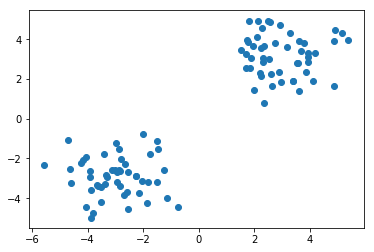

In [341]:
plt.scatter(X[:, 0], X[:, 1])

それでは、k-meansを用いてクラスタリングを行う。クラスタリングでは基本的にはわけるクラスターの数がハイパーパラメータとして必要である。`n_clusters`で指定する。

In [344]:
from sklearn.cluster import KMeans

In [347]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

予測した結果をもとにクラスタリングを行う。

In [350]:
y = model.predict(X)

In [351]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Numpyをうまく使うと、条件に当てはまるサンプルだけを抽出できる。

In [354]:
X0 = X[y==0]
X1 = X[y==1]

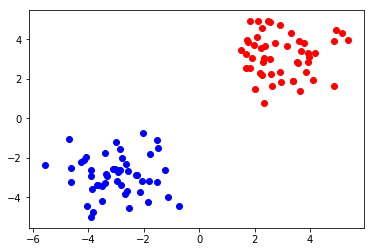

In [356]:
plt.scatter(X0[:, 0], X0[:, 1], color='red')
plt.scatter(X1[:, 0], X1[:,1 ], color='blue')